In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, precision_recall_curve
import matplotlib.pylab as plt

In [2]:
df1 = pd.read_csv('classification.csv')
df2 = pd.read_csv('scores.csv')

In [3]:
real = df1['true']
pred = df1['pred']

In [61]:
len(pred)

200

In [75]:
zip(list(real), list(pred))[0][1] == 0

True

In [76]:
TP = TN = FP = FN = int(0)

for x in zip(list(real), list(pred)):
    if x[0]==1 and x[1]==1:
        TP+=1
    elif x[0]==0 and x[1]==0:
        TN+=1
    elif x[0]==0 and x[1]==1:
        FP+=1
    elif x[0]==1 and x[1]==0:
        FN+=1
    else:
        print x
print TP, FP, FN, TN

with open('1.txt', mode='w') as _file:
    _file.write(str(TP) + ' ')
    _file.write(str(FP) + ' ')
    _file.write(str(FN) + ' ')
    _file.write(str(TN))

43 34 59 64


In [6]:
with open('2.txt', mode='w') as _file:
    _file.write(str(round(accuracy_score(real, pred), 2)) + ' ')
    _file.write(str(round(precision_score(real, pred), 2)) + ' ')
    _file.write(str(round(recall_score(real, pred), 2)) + ' ')
    _file.write(str(round(f1_score(real, pred), 2)))

In [7]:
roc_auc_score(df2['true'], df2['score_svm'])

0.70868347338935567

In [8]:
for classif in list(df2.keys())[1:]:
    print classif
    print roc_auc_score(df2['true'], df2[classif])

score_logreg
0.71918767507
score_svm
0.708683473389
score_knn
0.635154061625
score_tree
0.691926770708


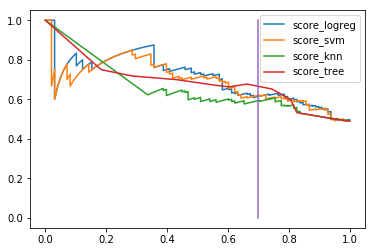

In [9]:
for classif in list(df2.keys())[1:]:
    precision, recall, thresholds = precision_recall_curve(df2['true'], df2[classif])
    plt.plot(recall, precision, label=str(classif))
    plt.legend()
plt.plot([0.7, 0.7], [0,1])
plt.show()

In [10]:
precision, recall, thresholds = precision_recall_curve(df2['true'], df2['score_tree'])
print precision[5]
print recall

0.651785714286
[ 1.          0.93877551  0.91836735  0.82653061  0.80612245  0.74489796
  0.66326531  0.60204082  0.56122449  0.42857143  0.28571429  0.18367347
  0.        ]


In [14]:
with open('4.txt', mode='w') as _file:
    _file.write('score_tree')

In [15]:
with open('3.txt', mode='w') as _file:
    _file.write('score_logreg')